In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from monai import transforms as mt

from singlenet import get_dataset
from singlenet.transforms.calculate_features import CalculateFeatures
from singlenet.transforms.cell_loader import VTKLoader, CellLabeld, CellIndexLoaderd
from singlenet.transforms.rand_cell_crop import RandCellCropd
from singlenet.transforms.cell_type import CellTyped

In [11]:
transforms = mt.Compose(
    [
        VTKLoader(keys=["image"]),
        CellIndexLoaderd(keys=["label"]),
        CellLabeld(cluster_key="image_cluster", indices_key="label", output_key="label"),
        RandCellCropd(keys=["image", "label"], crop_size=128),
        CellTyped(keys=["label"]),
        CalculateFeatures(keys=["image"]),
        mt.AsChannelLastd(keys=["image"]),
        mt.EnsureChannelFirstd(keys=["image"], channel_dim=-1),
        mt.RandRotated(
            keys=["image"], range_x=np.pi / 4, range_y=np.pi / 4, padding_mode="reflect", prob=0.5
        ),
        mt.RandFlipd(keys=["image"], spatial_axis=[0, 1], prob=0.5),
        mt.ToTensord(keys=["image", "label"]),
    ]
)

In [12]:
dataset = get_dataset(Path(r"C:\Users\czori\Documents\Hackathon\hires"))

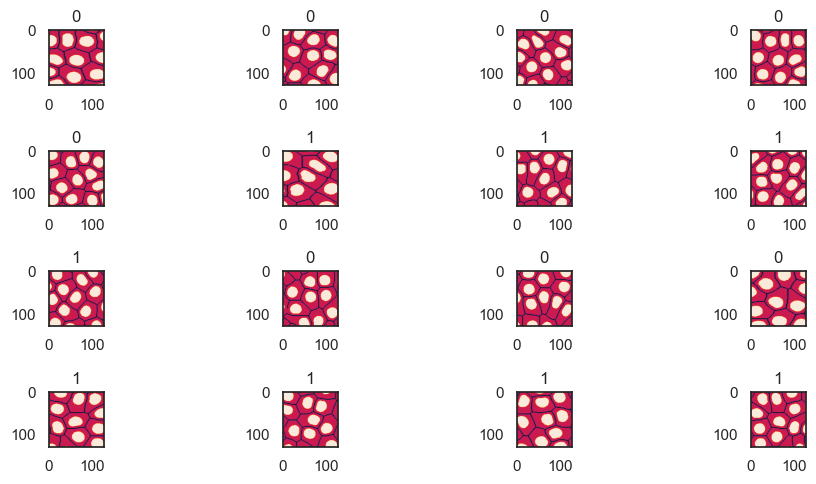

In [13]:
example = transforms(dataset[0])

n_plots = 4
sns.set_style("white")
sns.set_context("notebook")
fig, ax = plt.subplots(n_plots, n_plots, figsize=(10, 5))
for i in range(n_plots):
    for j in range(n_plots):
        example = transforms(dataset[i])
        ax[i, j].imshow(example["image"])
        ax[i, j].set_title(example["label"])

plt.tight_layout()
plt.show()

In [5]:
example

{'image': metatensor([[[2.0000],
          [2.0000],
          [2.0000],
          ...,
          [1.0000],
          [1.0000],
          [1.0000]],
 
         [[2.0000],
          [2.0000],
          [2.0000],
          ...,
          [1.0000],
          [1.0000],
          [1.0000]],
 
         [[2.0000],
          [2.0000],
          [2.0000],
          ...,
          [1.0000],
          [1.0000],
          [1.0000]],
 
         ...,
 
         [[1.0000],
          [1.0000],
          [1.0000],
          ...,
          [1.0000],
          [1.0000],
          [1.2392]],
 
         [[1.0000],
          [1.0000],
          [1.0000],
          ...,
          [1.0000],
          [1.0000],
          [1.2392]],
 
         [[1.0000],
          [1.0000],
          [1.0000],
          ...,
          [1.0000],
          [1.0000],
          [1.0000]]]),
 'label': 1,
 'image_frame': SimulationFrame(step=6000, cell_type=array([[1, 1, 2, ..., 1, 1, 1],
        [1, 1, 2, ..., 1, 1, 1],
        [1, 